# Geologic profiles -  Mount Alpi (Lucania, Southern Italy)

*Doc started 2019-05-12*

*Current version: 2022-12-09*

*Last running version: 2022-12-09*

This notebook describes the calculation of topographic profiles. As input data we need a DEM and a profile. 

Figures are plotted via matplotlib:

In [10]:
%matplotlib inline

Data sets can be plotted with pprint:

In [11]:
from pprint import pprint

## Defining the DEM input

The source DEM is from publicly available Aster data and refers to the the Mt. Alpi zone (Lucania, Southern Italy):

In [12]:
source_data = "../../example_data/mt_alpi/malpi_aster_w4u3.tif"

We read the DEM info using a GDAL-based raster-band reader method:

In [13]:
from gst.io.rasters.gdal_io import read_raster_band
result, err = read_raster_band(raster_source=source_data)

In [14]:
print(err)

The raster was successfully read. The result is composed by a set of various infos:

In [15]:
geotransform, epsg, band_params, data = result
for info in (geotransform, epsg, band_params, data):
    print(f"info type: {type(info)}:\n\n{info}\n\n")

info type: <class 'pygsf.geometries.georeferencing.geotransform.GeoTransform'>:

[ 5.80814583e+05  2.72759535e+01  0.00000000e+00  4.44429946e+06
  0.00000000e+00 -2.72759531e+01]


info type: <class 'int'>:

32633


info type: <class 'dict'>:

{'dataType': 'Float32', 'unitType': '', 'stats': {'min': 0.0, 'max': 1829.0, 'mean': 1092.0445648248, 'std_dev': 302.5523744617}, 'noData': 3.4028234663852886e+38, 'numOverviews': 0, 'numColorTableEntries': 0}


info type: <class 'numpy.ndarray'>:

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [1097. 1096. 1097. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...  638.  641.  647.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]




The EPSG projection code is 32633.

The 'data' variable stores the raster values as a Numpy array.

Given the array data and the geotransform specifications, we can create a grid by using the Grid class:

In [16]:
from pygsf.geometries.grids.rasters import Grid

grid = Grid(
    array = data,
    geotransform=geotransform)

We can plot this grid with a utility function:

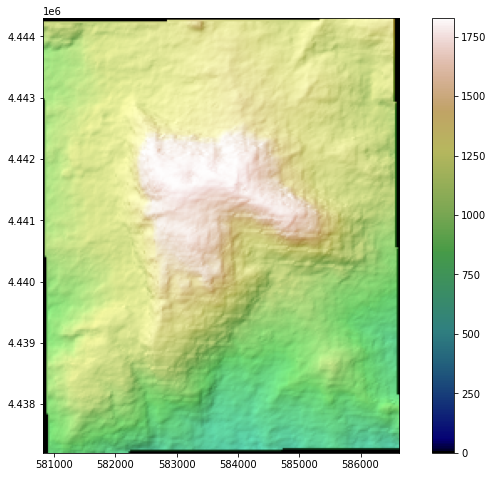

In [17]:
from gst.plots.parameters import *
from gst.plots.mpl import *

figure_parameters = FigurePlotParams(
    width=12,
    height=8
)

maps(
    grid,
    fig_params=figure_parameters
)

## Source profile definition

In order to digitally create a topographic/geological profile, we first need to define a trace with wich to extract elevations from DEMs and afterwards to manipulate geological layers. 

In this example, we read the trace from a line shapefile using a function based on GDAL/OGR.

In [23]:
from gst.io.vectors.ogr_io import read_line_shapefile_with_attributes

src_profile_shapefile_pth = "../../example_data/mt_alpi/short_profile.shp"

result, err = read_line_shapefile_with_attributes(
    src_profile_shapefile_pth)

In [24]:
print(err)

In [26]:
print(result)

([([Ln with 3 point(s): Point([ 583589.51156926 4441081.53933115]), Point([ 584232.20211804 4441997.96844701]), Point([ 584732.07254487 4442700.16737993])], ())], 32633)


Since there is just one line, so we extract it from the list:

In [27]:
lines, epsg_code = result

In [28]:
lines

[([Ln with 3 point(s): Point([ 583589.51156926 4441081.53933115]), Point([ 584232.20211804 4441997.96844701]), Point([ 584732.07254487 4442700.16737993])],
  ())]

In [29]:
lines, attributes = lines[0]
lines

[Ln with 3 point(s): Point([ 583589.51156926 4441081.53933115]), Point([ 584232.20211804 4441997.96844701]), Point([ 584732.07254487 4442700.16737993])]

This line is a 2D line instance, made up by 3 points.

In [30]:
profile_line = lines[0]

Since the spatial reference of the line profile is EPSG: 32633, i.e. the same as that of raster DEM CRS, no projection change is required before plotting against the DEM.

Now we plot the profile trace in a figure.

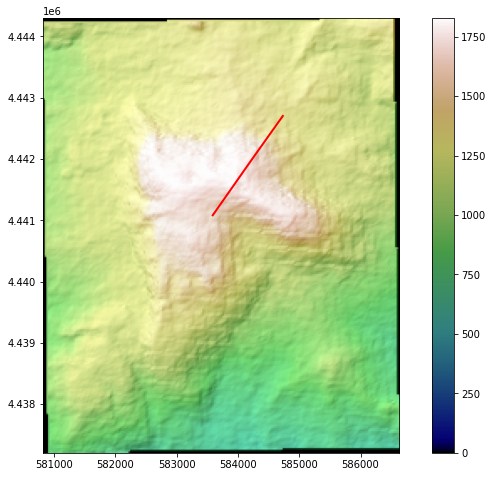

In [31]:
figure_parameters = FigurePlotParams(
    width=12,
    height=8
)

profile_parameters = ElevationPlotParams(
    color="red",
    width=2.0,
)

maps(        
    grid,
    lines = {
        'profile': {'data': [profile_line], 'params': profile_parameters},
    },
    fig_params=figure_parameters
)

### Reading geological attitudes

A few geological attitudes in the proximity of the profiles are available in a point shapefile:

In [32]:
attitudes_shape = "/home/mauro/Documents/projects/gsf/example_data/mt_alpi/attitudes.shp"

By using the *geopandas* module we can read the data. They are stored in a *geopandas.GeoDataFrame* instance.

In [33]:
import geopandas

attitudes = geopandas.read_file(attitudes_shape)

attitudes

Id  dip_dir  dip_ang                            Formation            type  \
0    1     90.0     18.0                  Mesozoic limestones  stratification   
1    2     95.0     30.0               Miocenic conglomerates  stratification   
2    3     72.0     26.0                Miocenic calcarenites  stratification   
3    4     75.0     40.0                  Mesozoic limestones  stratification   
4    5     80.0     15.0                  Mesozoic limestones  stratification   
5    6     60.0     25.0                Miocenic calcarenites  stratification   
6    7     30.0     15.0                  Mesozoic limestones  stratification   
7    8     70.0     35.0                  Mesozoic limestones  stratification   
8    9    105.0     40.0                  Mesozoic limestones  stratification   
9   10    135.0     21.0  Miocenic arenites and conglomerates  stratification   
10  11     80.0     30.0                  Mesozoic limestones  stratification   

                          geometry  
0   POINT (583531.375 4441614.401)  
1   POINT (583771.704 4441895.090)  
2   POINT (584184.366 4441269.220)  
3   POINT (584722.156 4441071.520)  
4   POINT (582878.687 4442105.863)  
5   POINT (584266.849 4441208.758)  
6   POINT (584249.684 4441182.484)  
7   POINT (584838.631 4440925.733)  
8   POINT (584644.096 4441353.934)  
9   POINT (585641.114 4440448.176)  
10  POINT (585200.730 4441084.297)

The data projection can be read with the *crs* geodataframe class attribute:

In [34]:
attitudes.crs

<Derived Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The projection of the source dataset is UTM33, as are the DEM and the profile, so we do not need any reprojection.

While the geopandas tools are handy for reading vectorial data, we need to read the source attitude data as a list of pygsf *GeorefAttitude* instances, in order to process them for the profile creation.

We use the '*extract_attitudes*' function from another of mine modules, 'gst'. 

In [35]:
from gst.geopandas.geopandas import extract_attitudes

attitudes, err = extract_attitudes(
    geodataframe = attitudes, 
    azim_fldnm = "dip_dir", 
    dip_ang_fldnm = "dip_ang"
)
if err is None:
    pprint(attitudes)      
else:    
    print(err)  

[(1, Point([ 583531.37529907 4441614.40052701]), Plane(090.00, +18.00)),
 (2, Point([ 583771.70421011 4441895.090107  ]), Plane(095.00, +30.00)),
 (3, Point([ 584184.36622852 4441269.2195727 ]), Plane(072.00, +26.00)),
 (4, Point([ 584722.15603709 4441071.52036989]), Plane(075.00, +40.00)),
 (5, Point([ 582878.68686144 4442105.86260592]), Plane(080.00, +15.00)),
 (6, Point([ 584266.84879147 4441208.75807415]), Plane(060.00, +25.00)),
 (7, Point([ 584249.6835672  4441182.48386002]), Plane(030.00, +15.00)),
 (8, Point([ 584838.63062953 4440925.73280247]), Plane(070.00, +35.00)),
 (9, Point([ 584644.09648907 4441353.9335429 ]), Plane(105.00, +40.00)),
 (10, Point([ 585641.1138067 4440448.1764091]), Plane(135.00, +21.00)),
 (11, Point([ 585200.72975492 4441084.2966943 ]), Plane(080.00, +30.00))]


Each record is defined by its *id* (a progressive counter, having not provided a field name to the '*extract_attitudes function*'), *position* and *attitude*. 

We note that the attitude points are 2D. To plot them in a topographic profile, they need to present also the elevation information. To calculate it, we use the grid previously read within the *pygsf* *georef_attitudes_3d_from_grid* function.

In [36]:
from pygsf.profiles.methods import attitudes_3d_from_grid

attitudes_3d, err = attitudes_3d_from_grid(
        structural_data=attitudes,
        height_source=grid,
)
if err is None:
    pprint(attitudes_3d)
else:
    print(err)    

[(1,
  Point([5.83531375e+05 4.44161440e+06 1.76556861e+03]),
  Plane(090.00, +18.00)),
 (2,
  Point([5.83771704e+05 4.44189509e+06 1.75692514e+03]),
  Plane(095.00, +30.00)),
 (3,
  Point([5.84184366e+05 4.44126922e+06 1.63303396e+03]),
  Plane(072.00, +26.00)),
 (4,
  Point([5.84722156e+05 4.44107152e+06 1.69753771e+03]),
  Plane(075.00, +40.00)),
 (5,
  Point([5.82878687e+05 4.44210586e+06 1.61465027e+03]),
  Plane(080.00, +15.00)),
 (6,
  Point([5.84266849e+05 4.44120876e+06 1.63630571e+03]),
  Plane(060.00, +25.00)),
 (7,
  Point([5.84249684e+05 4.44118248e+06 1.59342279e+03]),
  Plane(030.00, +15.00)),
 (8,
  Point([5.84838631e+05 4.44092573e+06 1.62696115e+03]),
  Plane(070.00, +35.00)),
 (9,
  Point([5.84644096e+05 4.44135393e+06 1.62694205e+03]),
  Plane(105.00, +40.00)),
 (10,
  Point([5.85641114e+05 4.44044818e+06 1.16620891e+03]),
  Plane(135.00, +21.00)),
 (11,
  Point([5.85200730e+05 4.44108430e+06 1.52778723e+03]),
  Plane(080.00, +30.00))]


Now the attitudes have a 3D point. We can therefore proceed calculating the projections of the attitude on the section. 

In this example, we choose the 'nearest' mapping method for projecting the attitudes on the section: it projects the attitude normally to the profile.

### Creating the Profiler instance

We create a Profiler instance, by defining the number of parallel profilers to create and their lateral offset (i.e., the perpendicular spacing between them):

In [37]:
from pygsf.profiles.profilers import Profiler

profiler = Profiler(
    src_trace=profile_line,
    num_profiles=5,
    offset=1000, # meters
)

The result can be displayed with the 'maps' function:

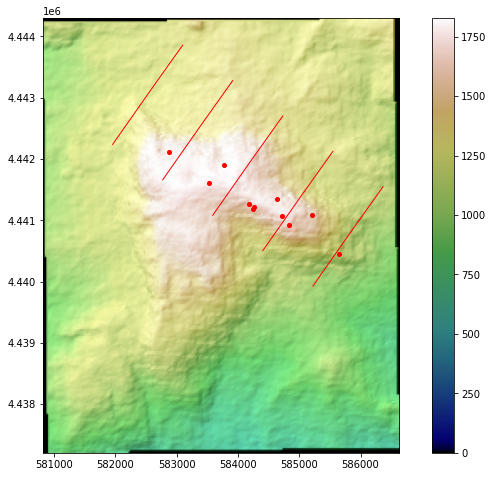

In [38]:
attitudes_list = [point for _, point, _ in attitudes_3d]

maps(        
    grid,
    lines = {
        'profile': {
            'data': profiler.lines, 
            'params': ElevationPlotParams(
                color="red",
                width=1.0,
            )
        },
    },
    points = {
        'attitudes': {
            'data': attitudes_list,
            'params': AttitudePlotParams(
                marker = 'o',
                markersize = 4,
                color = "red",
                alpha = 1.0,
                labels = False
            )
        },
    },
    fig_params = FigurePlotParams(
        width=12,
        height=8
    )
)


## Creating a set of parallel geological profiles

In [39]:
from pygsf.profiles.geoprofiles import GeoProfiles

geoprofiles = GeoProfiles(profiler=profiler)

In [40]:
err = geoprofiles.sample_grid(
    grid=grid,
    sampling_distance=10 # meters
)
assert not err

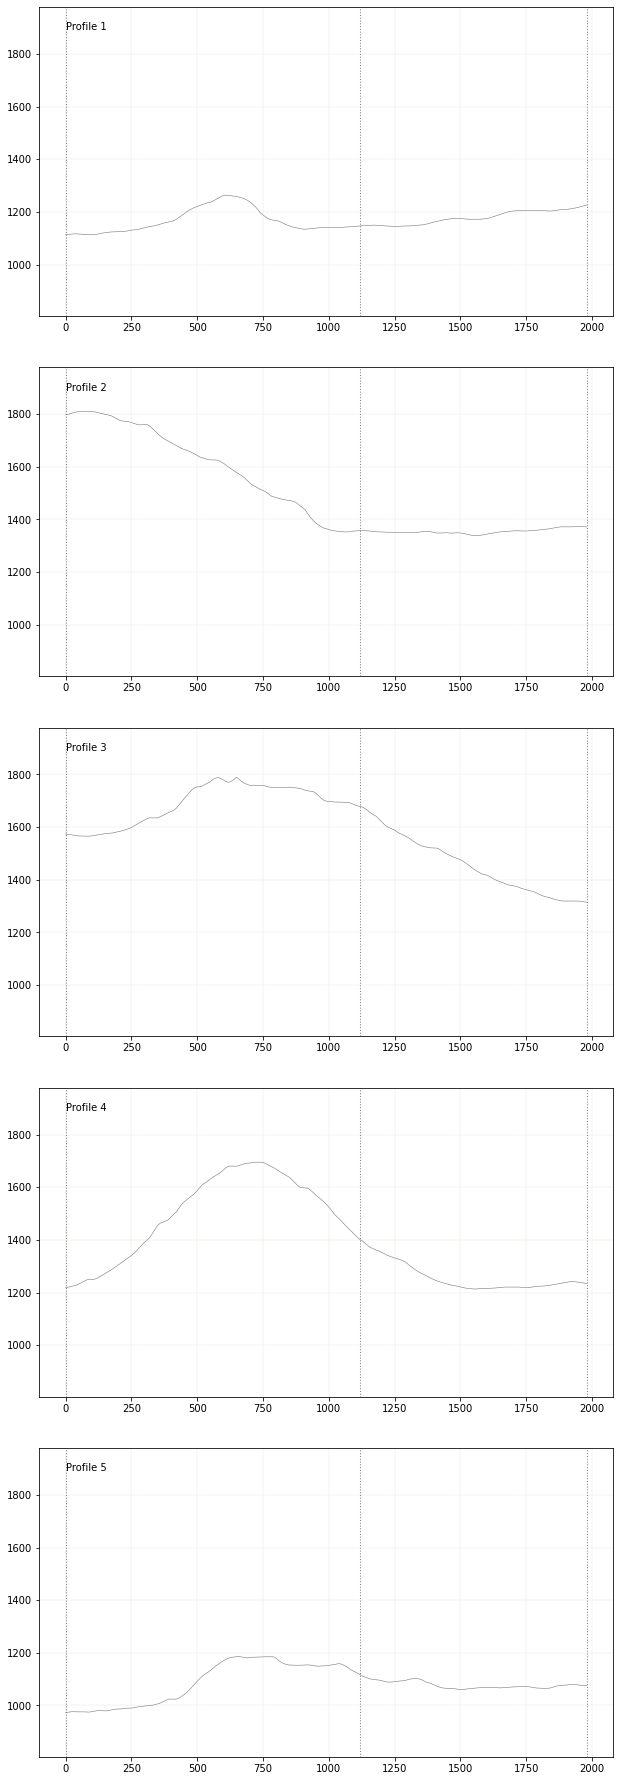

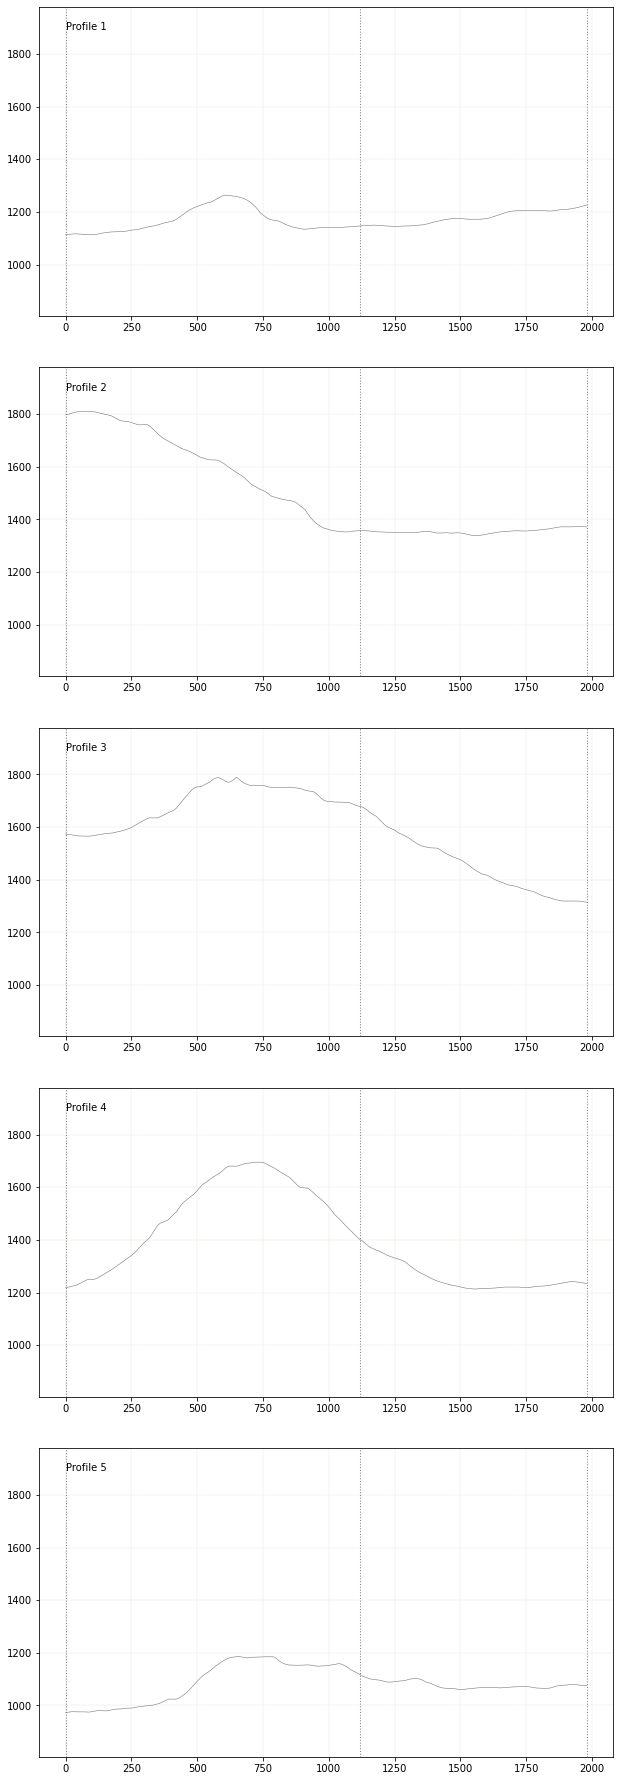

In [41]:
from gst.plots.mpl import *

profiles(
    geoprofiles,
    aspect=1, 
    linewidth=0.8,
    height=5,
    elevation_params=ElevationPlotParams(
        color="gray",
        width=0.6
    )
)

## Adding geological attitudes to profiles

In [42]:
err = geoprofiles.project_points(
    data=attitudes_3d,
    max_profile_distance = 500, # meters
    projection_method=ProjectionMethod.NEAREST,
    input_type=PointsInput.ATTITUDES,
    cat_key="stratifications",
)
print(err)

In [43]:
geoprofiles._points_projections

{'stratifications': [defaultdict(pygsf.profiles.profiletraces.PlaneTrace, {}),
  defaultdict(pygsf.profiles.profiletraces.PlaneTrace,
              {5: PlaneTrace(s=427.44, z=1614.65, dip_angle=10.74, down_sense=right, dist=170.12, src_dip_dir=80.00, src_dip_ang=15.00)}),
  defaultdict(pygsf.profiles.profiletraces.PlaneTrace,
              {1: PlaneTrace(s=402.89, z=1765.57, dip_angle=10.57, down_sense=right, dist=353.55, src_dip_dir=90.00, src_dip_ang=18.00),
               2: PlaneTrace(s=770.69, z=1756.93, dip_angle=16.12, down_sense=right, dist=317.95, src_dip_dir=95.00, src_dip_ang=30.00),
               3: PlaneTrace(s=495.21, z=1633.03, dip_angle=21.29, down_sense=right, dist=379.27, src_dip_dir=72.00, src_dip_ang=26.00),
               6: PlaneTrace(s=493.07, z=1636.31, dip_angle=22.92, down_sense=right, dist=481.51, src_dip_dir=60.00, src_dip_ang=25.00),
               7: PlaneTrace(s=461.70, z=1593.42, dip_angle=14.94, down_sense=right, dist=482.54, src_dip_dir=30.00, src_dip

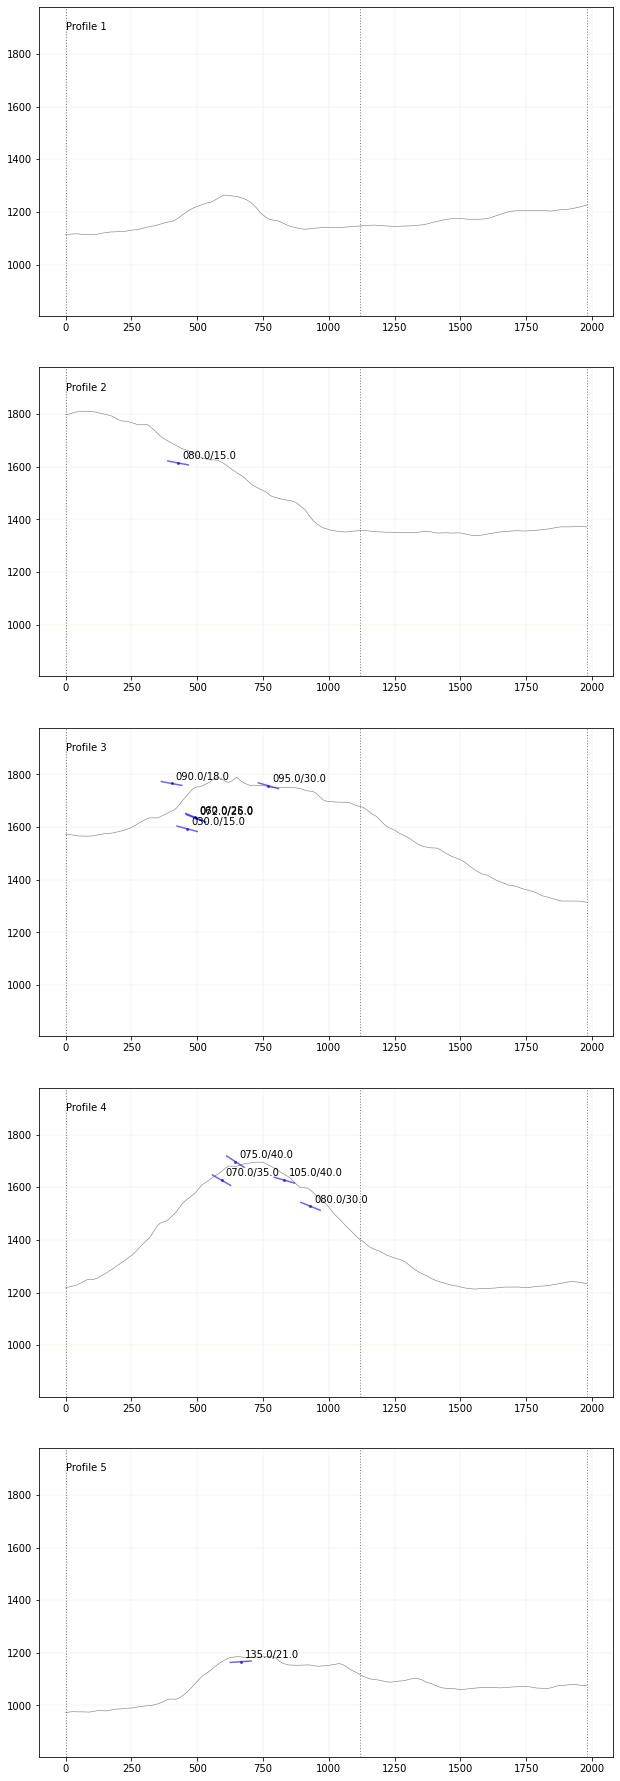

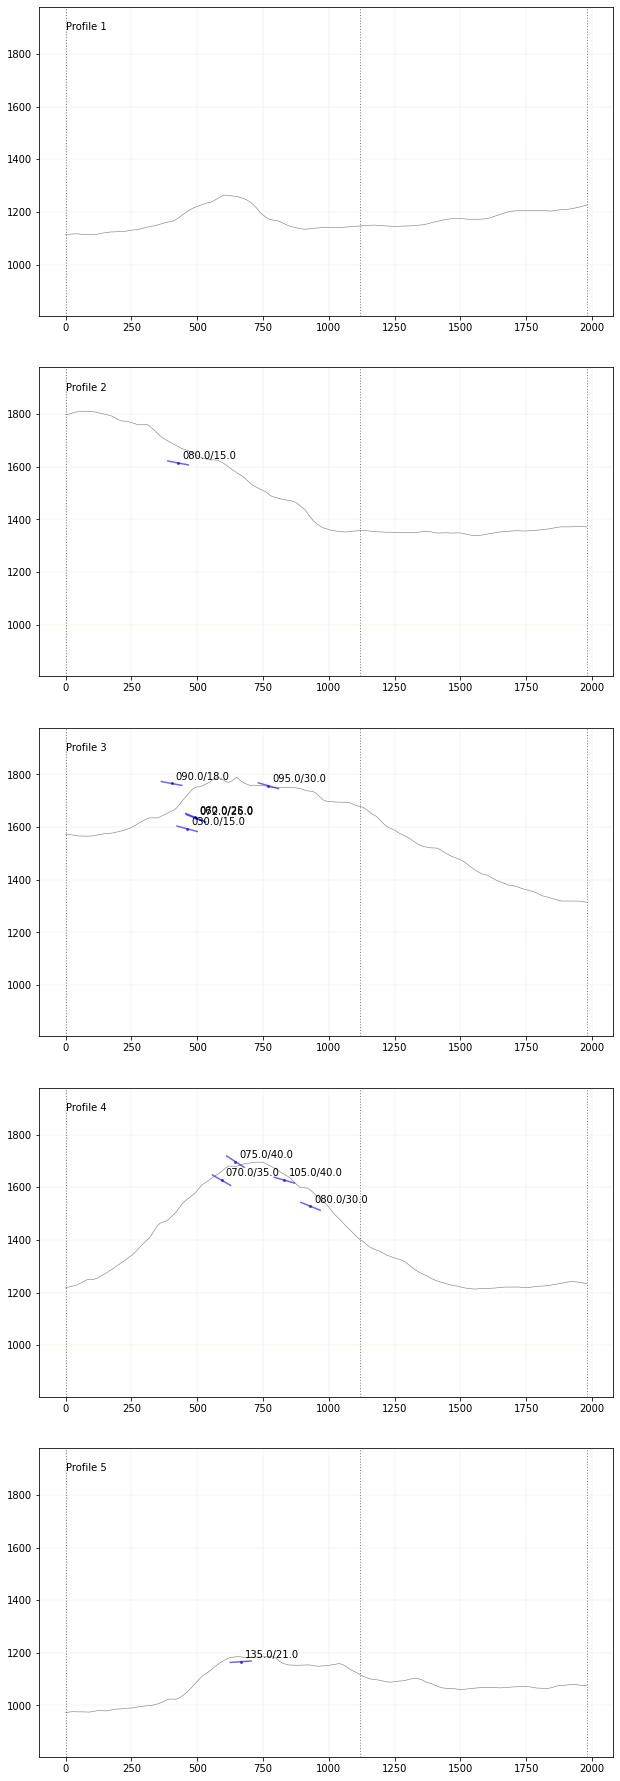

In [44]:
profiles(
    geoprofiles,
    aspect=1, 
    linewidth=0.8,
    height=5,
    elevation_params=ElevationPlotParams(
        color="gray",
        width=0.6
    ),
    stratifications = AttitudePlotParams(
                marker = 'o',
                markersize = 2,
                color = "blue",
                alpha = 0.6,
                labels=True,
            )
)

In [45]:
bool(err)

False